<a href="https://colab.research.google.com/github/MarshaGomez/DNN-Sketches-image-analysis/blob/main/Code/presentation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import seaborn as sns
import pandas as pd 
import os 

from PIL import Image
from os import listdir
from skimage import io
from matplotlib import image
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

print("Done")

Done


In [ ]:
# data loading
# reading from unzipped
BASE_DIR = "/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV"
base_path = "/content/gdrive/Shareddrives/COMPUTER_VISION"
SKETCHES_DIR = os.path.join(BASE_DIR, "sketches/png")
MIRFLICKR_DIR = os.path.join(BASE_DIR, "mirflickr/mirflickr25k")
test_path = "/content/gdrive/MyDrive/test/png"

PLOTS_PATH = os.path.join(base_path, "plots")
NUMPY_DATA = os.path.join(base_path, "numpy data")

print("Done")

Done


In [ ]:
# Settings:
img_size = 299
grayscale_images = True
num_class = 0
test_size = 0.2
train_size = 0.8

def get_img(data_path):
    # Getting image array from path:
    img = Image.open(data_path).convert('LA')
    img = img.resize((img_size, img_size))
    data = np.asarray(img)
    return data

def get_dataset(dataset_path='Dataset'):
  X= []
  X_test= []
  Y= []
  Y_test = []
  # Getting all data from data path:
  try:
    X = np.load(os.path.join(NUMPY_DATA,'train_tensor.npy'))
    Y = np.load(os.path.join(NUMPY_DATA,'train_labels.npy'))
  
  except:
    labels = listdir(dataset_path) # Geting labels
    X = []
    Y = []
    for i, label in enumerate(labels):
      datas_path = os.path.join(dataset_path,label)
      if os.path.isdir(datas_path):
        for data in listdir(datas_path):
          img = get_img(os.path.join(datas_path, data))
          X.append(img)
          print(img)
          Y.append(i)
          print(i)
    # Create dateset:
    X = np.array(X).astype('float32')
    Y = np.array(Y).astype('float32')
    Y = to_categorical(Y, num_class)
    if not os.path.exists(NUMPY_DATA):
      os.makedirs(NUMPY_DATA)
    np.save(os.path.join(NUMPY_DATA,'train_labels.npy'), X)
    np.save(os.path.join(NUMPY_DATA,'train_tensor.npy'), Y)
  
  #X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=42)
  return 1, 1, 1, 1 #X, X_test, Y, Y_test

In [ ]:
dataset_path = test_path
labels = listdir(dataset_path) # Geting labels
X = []
Y = []
for i, label in enumerate(labels):
  datas_path = os.path.join(dataset_path,label)
  print(datas_path)

  if os.path.isdir(datas_path):
    for data in listdir(datas_path):
      num_class += 1
      img = get_img(os.path.join(datas_path, data))
      X.append(img)
      Y.append(i)
# Create dateset:
X = np.array(X).astype('float32')
print(X.shape)
Y = np.array(Y).astype('float32')
print(Y.shape)
Y = to_categorical(Y, num_class)
if not os.path.exists(NUMPY_DATA):
  os.makedirs(NUMPY_DATA)
np.save(os.path.join(NUMPY_DATA,'train_labels.npy'), X)
np.save(os.path.join(NUMPY_DATA,'train_tensor.npy'), Y)

/content/gdrive/MyDrive/test/png/airplane
(1, 299, 299, 2)
(1,)


In [ ]:
X, X_test, Y, Y_test = get_dataset(test_path)

In [ ]:
train_img_path = os.path.join(base_path, "numpy data/train_tensor.npy")

In [ ]:
train_images = np.load(train_img_path)

In [ ]:
train_images[0].shape

(15,)

TypeError: ignored

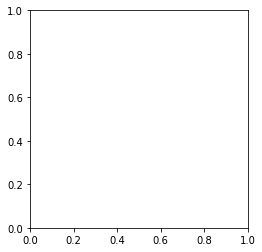

In [ ]:
plt.imshow(train_images[0])

In [ ]:
dataset_path = SKETCHES_DIR
labels = listdir(dataset_path) # Geting labels

print(labels)
for i, label in enumerate(labels):
  print(label)
  datas_path = os.path.join(dataset_path,label)
  print(datas_path)
  for data in listdir(datas_path):
    print(data)
    directory = os.path.join(datas_path,data)

    if os.path.isdir(directory):
      print(directory)

['png']
png
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png
filelist.txt
vase
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/vase
wheel
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/wheel
wheelbarrow
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/wheelbarrow
violin
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/violin
wrist-watch
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/wrist-watch
windmill
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/windmill
walkie talkie
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/walkie talkie
wineglass
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/wineglass
zebra
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/zebra
wine-bottle
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/wine-bottle
trumpet
/content/gdrive/Shareddrives/COMPUTER_VISION/MIRCV/sketches/png/trumpet
truck

In [ ]:
def plot_bar(train_labels, test_labels, title):
  # Train Values
  (unique, counts) = np.unique(train_labels, return_counts=True)
  counts = percentages(counts)
  bars1 = counts

  # Test Values
  (unique, counts) = np.unique(test_labels, return_counts=True)
  counts = percentages(counts)
  bars2 = counts

  # set width of bar
  barWidth = 0.40
  
  # set height of bar
  
  # Set position of bar on X axis
  r1 = np.arange(len(bars1))
  r2 = [x + barWidth for x in r1]

  # Make the plot
  plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Train set')
  plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Test set')
  
  # Add xticks on the middle of the group bars
  plt.xlabel('Class', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(bars1))], unique)
  plt.ylabel('Percentages quantity', fontweight='bold')

  
  # Create legend & Show graphic
  plt.legend()
  plt.title(title)

  return plt

In [ ]:


# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path, flatten=grayscale_images)
    img = imresize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img

def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('npy_dataset/X.npy')
        Y = np.load('npy_dataset/Y.npy')
    except:
        labels = listdir(dataset_path) # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path+'/'+label
            for data in listdir(datas_path):
                img = get_img(datas_path+'/'+data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = 1-np.array(X).astype('float32')/255.
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test

if __name__ == '__main__':
    get_dataset()